# Weather forcast data

**Problem Statement: Predicting rainfall from weather data**

**What is problem:**

**we want to predict it will rain or not on the base of previous weather data under different weather condition and want to build a model for prediction it will rain or not .** 

**Why it is important:**

**It is important for decision making in agriculture (deciding when to irrigate or harvest crops.), outdoor event (planning outdoor functions.), transportation (preparing for travel) and disaster management.**

**How we can solve this problem:**

**Data Exploration & Cleaning (EDA)**

**Convert categorical target into numeric format.**

**Data Split**

**Model Selection & Training**

**Deployment**

-**Importing Libraries** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report

**Load Data**

In [2]:
class Data:
    def __init__ (self, filename):
        self.filename = filename
    def load_data(self):
        self.df = pd.read_csv(self.filename)   
    def show_head(self):
        print(f"here is the head of dataset:\n {self.df.head(10)}") 
    def show_tail(self):
        print(f"here is the tail of dataset:\n {self.df.tail(10)}")
    def show_info(self):
        print(f"here is the info of dataset:\n {self.df.info()}")
    def show_describe(self):
        print(f"here is the summary of dataset:\n {self.df.describe()}")                
            
weather = Data("weather_forecast_data.csv")
df = weather.load_data()
weather.show_head()
weather.show_tail()
weather.show_info()
weather.show_describe()                       

here is the head of dataset:
    Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614189  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain
5    26.147353  48.217260   15.258547    59.766279  1049.738751  no rain
6    20.939680  40.799444    2.232566    45.827508  1014.173766  no rain
7    32.294325  51.848471    2.873621    92.551497  1006.041733  no rain
8    34.091569  48.057114    5.570206    82.524873   993.732047  no rain
9    19.586038  82.978293    5.760537    98.014450  1036.503457     rain
here is the tail of dataset:
       Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
2490    27.365273  43.619778    3.390757    69.498333   980.6

# Data preprocessing

In [3]:
class Data_preprocessing:
    def __init__(self,filename):
        self.filename = filename
    def load_data(self):
        self.df = pd.read_csv(self.filename)    
    def check_null(self):
        print(f"here is the null values in dataset:\n {self.df.isnull().sum()}")
    def drop_nullvalues(self):
        print(f"here is droped null values in dataset:\n {self.df.dropna()}") 
    def fillna(self):
        print(f"fill null values:\n {self.df.fillna(0)}")
    def check_duplicates(self):
        print(f"here are the duplicate rows in dataset:\n {self.df.duplicated().sum()}")
    def convert_into_numerical(self):
        #conversion of catagorical column into numerical column
        self.df["Rain"]= self.df["Rain"].map({"no rain": 0, "rain": 1}) 
    def check_shape(self):
        print(f"here is the shape of dataset:\n {self.df.shape}")
    def save_file(self):
        self.df.to_csv("weather_cleaned.csv", index=False)

# Use the DataFrame from the weather object
weather = Data_preprocessing("weather_forecast_data.csv")
weather.load_data()
weather.check_null()
weather.drop_nullvalues()
weather.fillna()
weather.check_duplicates()
print(f"here you can see rain column is categorical column we need to convert into numerical column:\n {weather.df.head()}")
weather.convert_into_numerical()
print(f"here you can see rain column is converted into numerical column:\n {weather.df.head()}")
weather.check_shape()
weather.save_file()

here is the null values in dataset:
 Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64
here is droped null values in dataset:
       Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1       27.879734  46.489704    5.952484     4.990053   992.614189  no rain
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain
...           ...        ...         ...          ...          ...      ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.3

# univariate analysis

In [4]:
class Graphs:
    def __init__(self, filename):
        self.filename = filename
    def load_data(self):
        self.df  = pd.read_csv(self.filename)
    def barplot(self):    
        rain_counts = self.df['Rain'].value_counts()
        plt.figure(figsize=(6, 4))
        sns.barplot(x=rain_counts.index, y=rain_counts.values)
        plt.xlabel('Rain (0 = No, 1 = Yes)')
        plt.ylabel('Count')
        plt.title('Bar Chart of Rain')
        plt.show()
    def histogram(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['Temperature'], bins=20, kde=True) # type: ignore
        plt.title('Histogram of Temperature')
        plt.xlabel('Temperature')
        plt.ylabel('Frequency')
        plt.show() 
    def scatterplot(self):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Temperature', y='Humidity', hue='Rain', data=self.df)
        plt.title('Scatter Plot of Temperature vs Humidity')
        plt.xlabel('Temperature')
        plt.ylabel('Humidity')
        plt.legend(title='Rain', loc='upper right', labels=['No Rain', 'Rain'])
        plt.show()
    def piechart(self):
        rain_counts = self.df['Rain'].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(rain_counts, labels=['No Rain', 'Rain'], autopct='%1.1f%%', startangle=140)
        plt.title('Pie Chart of Rain Distribution')
        plt.axis('equal') 
    def line_chart(self):
        plt.figure(figsize=(8, 3))
        plt.plot(self.df.index, self.df['Temperature'], color='green', linewidth=2)
        plt.title('Temperature Trend (by Row Index)')
        plt.xlabel('Index')
        plt.ylabel('Temperature')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    def heatmap(self):
        corr_matrix = self.df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title('Correlation Heatmap of Numerical Features')
        plt.show()
    def area_chart(self):
        plt.figure(figsize=(10, 5))
        plt.stackplot(self.df.index, self.df['Temperature'], self.df['Humidity'],
                      labels=['Temperature', 'Humidity'],
                      alpha=0.5, colors=['skyblue', 'lightgreen'])
        plt.title("Area Chart - Temperature and Humidity")
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# bivariate class

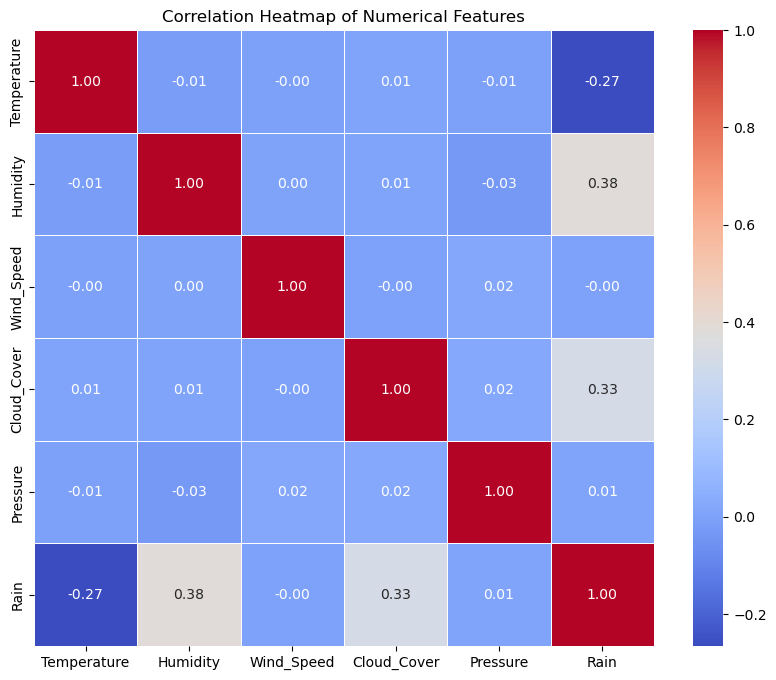

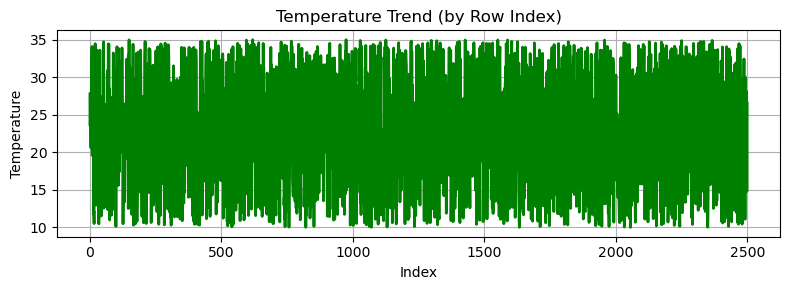

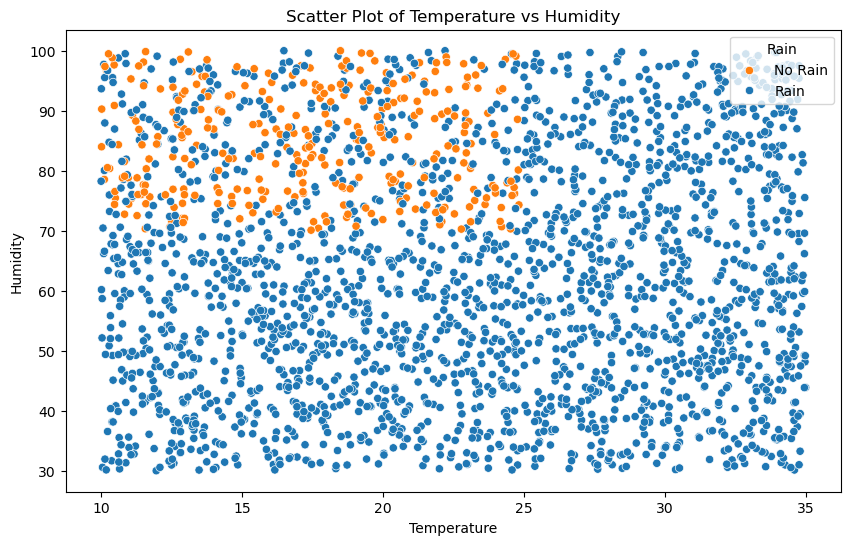

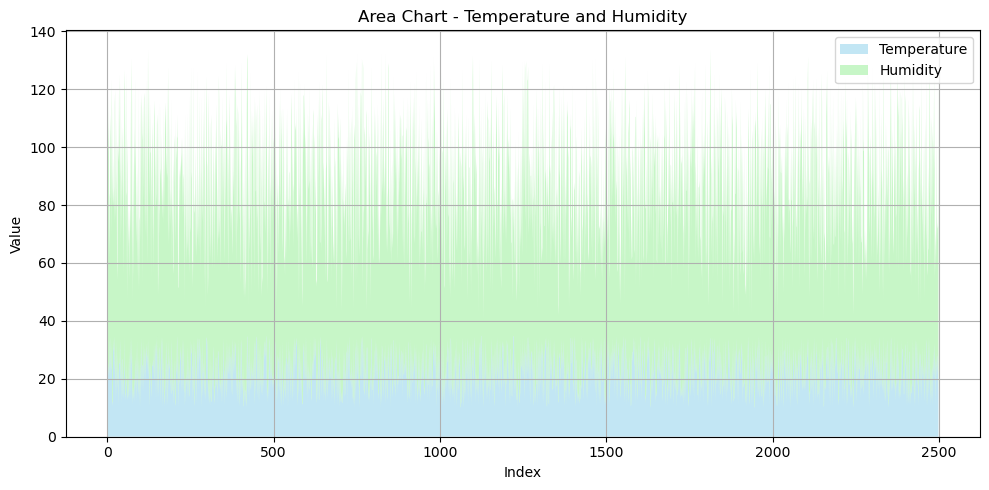

In [5]:
class Bivariate(Graphs):
    def __init__(self, filename):
        super().__init__(filename)
        self.load_data()  # Load the data so self.df is available

# Create an object of Bivariate
bivariate = Bivariate("weather_cleaned.csv")
bivariate.heatmap()
bivariate.line_chart()
bivariate.scatterplot()
bivariate.area_chart()


# Univariate Class

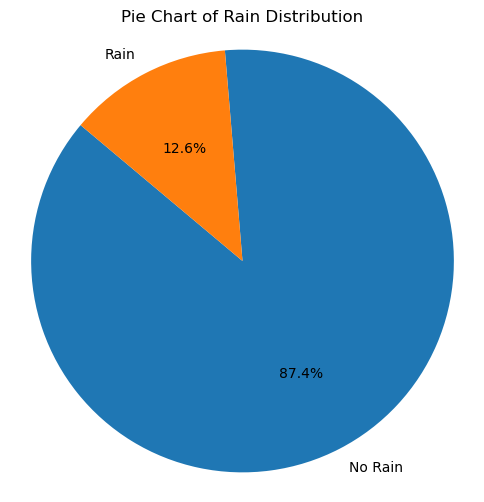

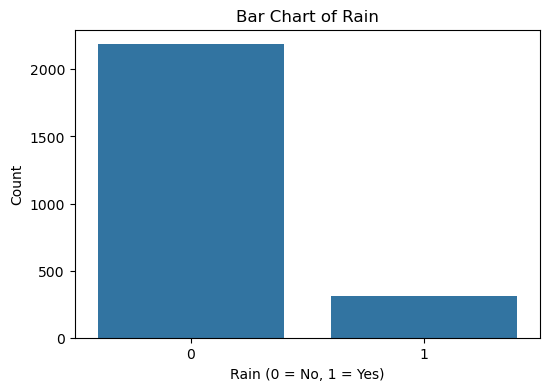

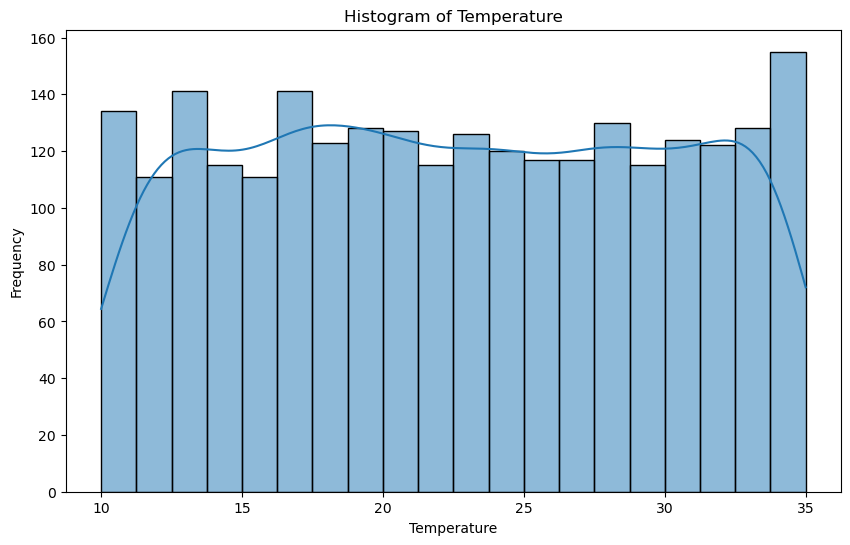

In [6]:
class Univariate(Graphs):
    def __init__(self, filename):
        super().__init__(filename)
        self.load_data() 

# Create an object of Univariate
univariate = Univariate("weather_cleaned.csv")
univariate.piechart()
univariate.barplot() 
univariate.histogram()

# Data Split

In [7]:
class Model:
    def __init__(self, dataframe, row_limit=2500, test_size=0.2, random_state=56):
        self.df = dataframe
        self.row_limit = row_limit
        self.test_size = test_size
        self.random_state = random_state

    def split_data(self):
        # Split into X and y
        self.X = self.df.iloc[0:self.row_limit, 0:-1]
        self.y = self.df.iloc[0:self.row_limit, -1]

        # Train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )

    def train_model(self):
        #Scale the features
        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        # Train the SVM classifier
        self.classifier = svm.SVC(kernel='rbf', gamma="scale", C=2, class_weight='balanced')
        self.classifier.fit(self.X_train_scaled, self.y_train)

    def evaluate_model(self):
        # Predict on test data
        self.y_pred = self.classifier.predict(self.X_test_scaled)

        #evaluation report
        print("Classification Report:")
        print(classification_report(self.y_test, self.y_pred))

df = pd.read_csv("weather_cleaned.csv")
model = Model(df)

# Prepare the data (split X/y, train/test)
model.split_data()

# Train the SVM model
model.train_model()

# Evaluate the model
model.evaluate_model()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       441
           1       0.73      0.98      0.84        59

    accuracy                           0.96       500
   macro avg       0.87      0.97      0.91       500
weighted avg       0.97      0.96      0.96       500



# Here are the final results

# save this into pickle file

In [8]:
import pickle
with open("svm_model.pkl", "wb") as file:
    pickle.dump(model.classifier, file)